In [121]:
import pandas as pd 
import numpy as np
import pandas as pd



import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer

import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline
from statsmodels.tsa.seasonal import seasonal_decompose


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



%matplotlib inline

In [122]:
# this is a function for plotting (moved up here)


def create_plot(dataframe,x,y,ylim,title,xlabel,ylabel,meanline="price",xticklabel=False):
    """
    Plot creates bar chart visualizations
    
    INPUTS:
    dataframe: pandas dataframe containing columns to be plotted
    x: column of dataframe as a str"
    y: column of dataframe as a str"
    ylim: int upper boundary of y-axis
    title: str title for plot"
    xlabel: str title for x-axis"
    ylabel: str title for y-axis"
    meanline: str indicating which mean to take "price" or "occupancy"
    xticklabel: boolean True or False if labels need to be rotated 90 degrees
    
    OUTPUT:
    barchart plot
    """
    
    # Create plot size
    f, ax = plt.subplots(figsize=(8,5))
    # Set background style
    sns.set_style("darkgrid")
    
    if y == "price":
        color="coral"
    else:
        color="cornflowerblue"
    
    # Plot data 
    sns.barplot(x,y,data=dataframe,color=color,saturation=.5,)
    
    # Add titles and labels
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.ylim(0,ylim)
    
    # Add mean line for year
    if meanline == 'price': 
        plt.axhline(new_df[meanline].mean(),color='r',label='Avg for Year')
    else:
        plt.axhline(new_df[meanline].mean()*100,color='b',label='Avg for Year')
    plt.legend();
    
    # Set x-axis labels and rotate vertical
    if(xticklabel):
        ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
    
    # Move title and plot slightly further apart
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    plt.show()
    
    
    
current_palette = sns.color_palette("muted")

## Read the dataset

In [123]:
calendar = pd.read_csv("calendar.csv")
listing = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

### Explor The Three Datasets

In [124]:
#let's explpre each dataset

print("Number of rows and columns: ", calendar.shape)
print("-------------")
print(calendar.columns.values)
print('Missing values are":',calendar.isnull().sum())


Number of rows and columns:  (1393570, 4)
-------------
['listing_id' 'date' 'available' 'price']
Missing values are": listing_id         0
date               0
available          0
price         459028
dtype: int64


In [125]:
#define a function to read and explor other datasets,

def read_file(file_path):
    
    data = pd.read_csv(file_path)
    
    print("Number of rows and columns: ", data.shape)
    print("-------------")
    print('General info about the dataset":',data.info())
    print(data.columns[data.isnull().any()])
    
    return read_file

In [126]:
read_file("reviews.csv")

Number of rows and columns:  (84849, 6)
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
General info about the dataset": None
Index(['comments'], dtype='object')


<function __main__.read_file(file_path)>

In [127]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [128]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [129]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [130]:
# now let's have a nother look at the dataset info

# calendar.info()
reviews.info()
# listing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## About the three datasets:
    
### Calender dataset:
Has a litte data, also it has many missing values in price column. After looking to the dataset, it seems missing are ok because these listing are unavailable for those days. so might be romved in the next steps. ( kept only 2016 ). will take the occuped lists for the analysis

### Listings dataset:

This dataset is the largest one. It has more than 90 columns and 3900 rows, also it has many missing values about 46 columns has missing value.
    

### Reviews dataset:

Reviews dataset has 6 columns and more than 84000 rows, missing are ok because.

#### a good practice is to change the data type and extract new columns to help you in the analysis:

##### In the next set we are going to  perpare the data for analsis

In [136]:
calendar = calendar.dropna(axis = 0, subset = ['price'], how = 'any')
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar.date.dt.month
calendar['year'] = calendar.date.dt.year
calendar['day'] = calendar.date.dt.day
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar['price'].fillna(0, inplace=True)
calendar['day'] = calendar.date.dt.weekday_name
calendar['month'] = calendar.date.dt.month
calendar['year'] = calendar.date.dt.year

listing['monthly_price'] = pd.to_numeric(listing['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['weekly_price'] = pd.to_numeric(listing['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['price'] = pd.to_numeric(listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

reviews = reviews.dropna(axis = 0, subset = ['comments'], how = 'any')
reviews['date'] = pd.to_datetime(reviews['date'])



In [137]:
calendar.head(3)

,listing_id,date,available,price,month,year,day
0,241032,2016-01-04,t,85.0,1,2016,Monday
1,241032,2016-01-05,t,85.0,1,2016,Tuesday
9,241032,2016-01-13,t,85.0,1,2016,Wednesday


In [138]:
# remove any data from 2017 

calendar = calendar[calendar.year != 2017]

In [140]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [141]:
# fill with 0

calendar['price'].fillna(0, inplace=True)

In [142]:
# change column names to match it with other dataset's columns.

listing = listing.rename(columns = {'id':'listing_id'})

##### Now after changing the data type and drop some of the the NaN values, and extracted new columns. lets do the  

## Exploratory Data Analysis

#The Average room prices is:

round(listing['price'].sum()/listing.shape[0], 0)


- When are the most popular times of the year for rentals of Seattle homes? ( Identify the peak seasons,months, days) 
- What is the monthly occupancy ratio for the city?
- What is the average price/night per neighbourhood?
- What is the average price on weekend and weekday?
- Does reviews effect listing pricest? 
- How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?

In [143]:
listing.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

In [144]:
#let's have a look for the missing value

(listing.isnull().sum()[listing.isnull().sum().nonzero()[0]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

##### I can see there are a lot of featues that have a high number of  NaN  within the listing dataset. However, there are a few columns that I belive can be used for our analysis.

- host_location
- property_type
- room_type
- host_is_superhost
- neighbourhood
- neighbourhood_group_cleansed
- host_listings_count
- number_of_reviews
- review_scores_value
- bathrooms
- bedrooms
- beds
- host_response_time
- price
- longitude
- latitude

##### I will create a new dataset that includes these features and call it new_list.

In [145]:
listing_list = listing[['listing_id','property_type', 'room_type','host_is_superhost', 'neighbourhood', 'neighbourhood_group_cleansed',
                        'review_scores_value', 'number_of_reviews', 'bathrooms', 'bedrooms', 'beds'
                        ,'host_listings_count','host_response_time','price', 'longitude', 'latitude'
                        ]]

new_list = listing_list.dropna(axis = 0, how = 'any')
new_list.head()

,listing_id,property_type,room_type,host_is_superhost,neighbourhood,neighbourhood_group_cleansed,review_scores_value,number_of_reviews,bathrooms,bedrooms,beds,host_listings_count,host_response_time,price,longitude,latitude
0,241032,Apartment,Entire home/apt,f,Queen Anne,Queen Anne,10.0,207,1.0,1.0,1.0,3.0,within a few hours,85.0,-122.371025,47.636289
1,953595,Apartment,Entire home/apt,t,Queen Anne,Queen Anne,10.0,43,1.0,1.0,1.0,6.0,within an hour,150.0,-122.365666,47.639123
2,3308979,House,Entire home/apt,f,Queen Anne,Queen Anne,10.0,20,4.5,5.0,7.0,2.0,within a few hours,975.0,-122.369483,47.629724
4,278830,House,Entire home/apt,f,Queen Anne,Queen Anne,9.0,38,2.0,3.0,3.0,2.0,within an hour,450.0,-122.372471,47.632918
6,1909058,House,Private room,t,Queen Anne,Queen Anne,10.0,58,1.0,1.0,1.0,1.0,within an hour,80.0,-122.368519,47.636605


In [21]:
#merge the two data sets 

new_df = pd.merge(calendar, new_list, on=['listing_id', 'listing_id'], how='right')

In [22]:
# drop any missing to make sure
new_df= new_df.dropna(axis = 0, how = 'any')

In [23]:
#look for missing 
new_df.isnull().sum()

listing_id                      0
date                            0
available                       0
price_x                         0
month                           0
year                            0
day                             0
property_type                   0
room_type                       0
host_is_superhost               0
neighbourhood                   0
neighbourhood_group_cleansed    0
review_scores_value             0
number_of_reviews               0
bathrooms                       0
bedrooms                        0
beds                            0
host_listings_count             0
host_response_time              0
price_y                         0
longitude                       0
latitude                        0
dtype: int64

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644418 entries, 0 to 644417
Data columns (total 22 columns):
listing_id                      644418 non-null int64
date                            644418 non-null datetime64[ns]
available                       644418 non-null object
price_x                         644418 non-null float64
month                           644418 non-null float64
year                            644418 non-null float64
day                             644418 non-null object
property_type                   644418 non-null object
room_type                       644418 non-null object
host_is_superhost               644418 non-null object
neighbourhood                   644418 non-null object
neighbourhood_group_cleansed    644418 non-null object
review_scores_value             644418 non-null float64
number_of_reviews               644418 non-null int64
bathrooms                       644418 non-null float64
bedrooms                        644418 non-null float

Let's clean and explor the dataset

In [25]:
# rename and delete unnecessary  or repated columns

new_df.drop(['price_y'], axis = 1, inplace=True)

new_df = new_df.rename(columns = {'price_x':'price' })

In [26]:
# as it is all about 2016 we don't need that columns 

new_df = new_df.drop(['year'], axis=1)

In [27]:
new_df.describe()

,listing_id,price,month,review_scores_value,number_of_reviews,bathrooms,bedrooms,beds,host_listings_count,longitude,latitude
count,6.444180e+05,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000,644418.000000
mean,4.667148e+06,137.742245,6.614441,9.436132,31.207817,1.267689,1.290738,1.778929,8.281508,-122.332933,47.628818
std,2.813141e+06,107.143707,3.417631,0.721666,44.189003,0.596434,0.850146,1.204831,27.099378,0.032216,0.043204
min,4.291000e+03,10.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-122.417219,47.508394
25%,2.110357e+06,75.000000,4.000000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000,-122.354334,47.608163
50%,4.637801e+06,105.000000,7.000000,10.000000,15.000000,1.000000,1.000000,1.000000,2.000000,-122.329518,47.623839
75%,7.204672e+06,159.000000,10.000000,10.000000,38.000000,1.000000,2.000000,2.000000,3.000000,-122.309450,47.663301
max,1.011834e+07,1650.000000,12.000000,10.000000,474.000000,8.000000,6.000000,15.000000,502.000000,-122.257085,47.733358


In [28]:
new_df.corr()

,listing_id,price,month,review_scores_value,number_of_reviews,bathrooms,bedrooms,beds,host_listings_count,longitude,latitude
listing_id,1.000000,-0.044612,-0.009959,0.119609,-0.477201,-0.030200,-0.058904,-0.038825,-0.065911,0.001382,-0.007103
price,-0.044612,1.000000,0.042793,-0.038405,-0.123322,0.543056,0.650367,0.628978,0.200999,-0.118826,-0.014202
month,-0.009959,0.042793,1.000000,0.008682,-0.008327,0.022769,0.020435,0.012823,-0.022837,-0.003479,0.004709
review_scores_value,0.119609,-0.038405,0.008682,1.000000,0.060028,0.009465,-0.023741,-0.056927,-0.112899,-0.080506,-0.026516
number_of_reviews,-0.477201,-0.123322,-0.008327,0.060028,1.000000,-0.109909,-0.122676,-0.119720,-0.105473,-0.007908,-0.040257
bathrooms,-0.030200,0.543056,0.022769,0.009465,-0.109909,1.000000,0.595112,0.498524,0.128082,-0.020694,-0.025837
bedrooms,-0.058904,0.650367,0.020435,-0.023741,-0.122676,0.595112,1.000000,0.753799,0.098166,-0.066071,0.026927
beds,-0.038825,0.628978,0.012823,-0.056927,-0.119720,0.498524,0.753799,1.000000,0.124137,-0.087993,0.017748
host_listings_count,-0.065911,0.200999,-0.022837,-0.112899,-0.105473,0.128082,0.098166,0.124137,1.000000,-0.014750,-0.038062
longitude,0.001382,-0.118826,-0.003479,-0.080506,-0.007908,-0.020694,-0.066071,-0.087993,-0.014750,1.000000,-0.171231


In [30]:
#see the property type list

new_df.property_type.value_counts()

House              304782
Apartment          282692
Townhouse           15706
Condominium         13801
Loft                 6500
Bed & Breakfast      5954
Cabin                4806
Other                3980
Bungalow             2138
Camper/RV            1824
Boat                  813
Dorm                  422
Treehouse             363
Chalet                299
Yurt                  177
Tent                  161
Name: property_type, dtype: int64

In [31]:
# property type by percentage

(new_df.property_type.value_counts()*100)/(new_df.property_type.count())

House              47.295699
Apartment          43.867800
Townhouse           2.437238
Condominium         2.141622
Loft                1.008662
Bed & Breakfast     0.923934
Cabin               0.745789
Other               0.617612
Bungalow            0.331772
Camper/RV           0.283046
Boat                0.126160
Dorm                0.065485
Treehouse           0.056330
Chalet              0.046398
Yurt                0.027467
Tent                0.024984
Name: property_type, dtype: float64

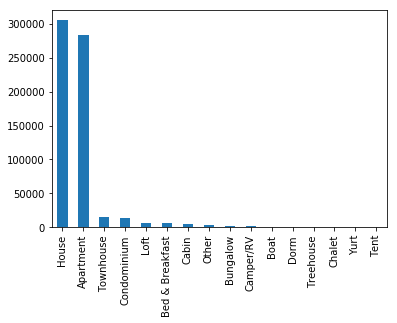

In [32]:
# visulize it 


new_df.property_type.value_counts().plot.bar();

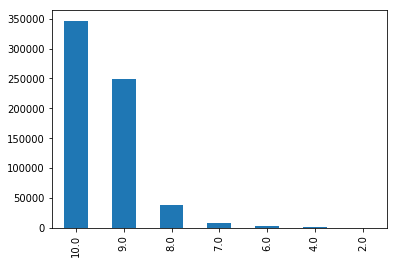

In [33]:
df = pd.DataFrame(new_df, columns= ["review_scores_value"])
df["review_scores_value"].value_counts().plot.bar()
plt.show();

### Q - When are the most popular times of the year for rentals of Seattle homes?
( Is there a peak seasons,months, days?)

### What is the average price/night per month?

In [34]:
# What is the monthly average price/night for the city?

avg_price_per_month = new_df.groupby(new_df['month'])['price'].mean()
avg_price_per_month = pd.DataFrame(avg_price_per_month).reset_index()
avg_price_per_month

,month,price
0,1.0,120.602429
1,2.0,123.207713
2,3.0,128.101769
3,4.0,134.608485
4,5.0,140.135880
5,6.0,148.710157
6,7.0,152.935883
7,8.0,151.672463
8,9.0,143.159320
9,10.0,136.433226


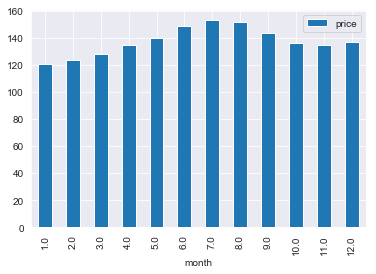

In [147]:
new_df.groupby(['month'])[['price']].mean().plot(kind="bar");

In [192]:
# Average price for each week of 2016
weekly = round(new_df.groupby(new_df['date'].dt.strftime('%W'))['price'].mean(),2)
weekly = pd.DataFrame(weekly).reset_index()
weekly.columns=['week_number','price']
weekly.head(7)

,week_number,price
0,01,122.19
1,02,120.99
2,03,120.76
3,04,118.88
4,05,122.20
5,06,124.73
6,07,123.74


In [195]:
# explore the priciest week 

weekly.loc[weekly['price'].idxmax()]

week_number        27
price          153.57
Name: 26, dtype: object

### What is the average price/night per neighbourhood?

In [198]:
avg_price_per_neighbourhood = pd.DataFrame(new_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False))
avg_price_per_neighbourhood['counts'] = new_df.neighbourhood_group_cleansed.value_counts()
avg_price_per_neighbourhood.head()

,price,counts
neighbourhood_group_cleansed,,
Magnolia,220.659366,11552
Downtown,194.190063,92043
Queen Anne,179.013443,44111
Cascade,156.409973,11852
West Seattle,138.170471,32639


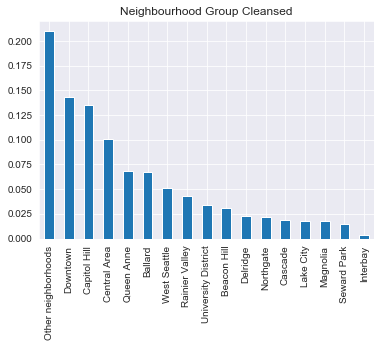

In [200]:
Cleansed_Neighbourhood = new_df['neighbourhood_group_cleansed'].value_counts()
(Cleansed_Neighbourhood/new_df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

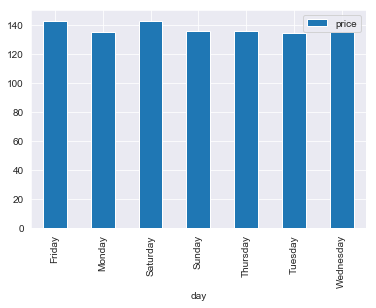

In [201]:
new_df.groupby(['day'])[['price']].mean().plot(kind="bar");

### Number of listing per neighbourhood

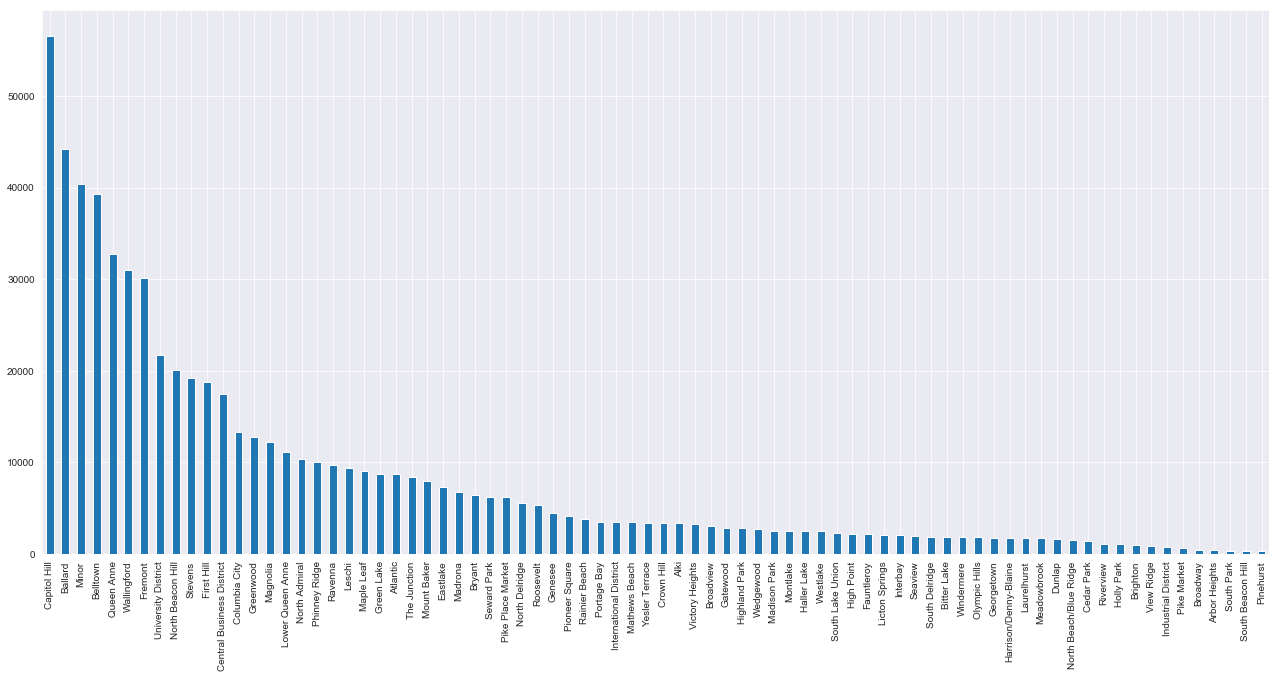

In [202]:
df = pd.DataFrame(new_df, columns= ["neighbourhood", 'a'])
df["neighbourhood"].value_counts().plot.bar(figsize=(22,10))
plt.show();

### What is the average price on weekedn and weekday?

In [203]:
avg_price_per_nigh = new_df.groupby(new_df['day'])['price'].mean()
avg_price_per_nigh = pd.DataFrame(avg_price_per_nigh).reset_index()
avg_price_per_nigh

,day,price
0,Friday,143.081488
1,Monday,135.342979
2,Saturday,143.285823
3,Sunday,136.166418
4,Thursday,136.284716
5,Tuesday,135.028285
6,Wednesday,135.048995


In [204]:
# identify the weekend day
new_df["weekend"] = new_df["day"].isin(["Saturday", "Sunday"])

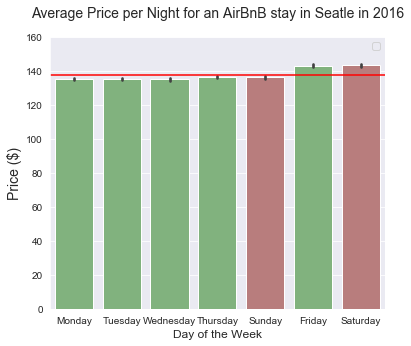

In [205]:
f, ax = plt.subplots(figsize=(6,5))
# Set background style
sns.set_style("darkgrid")
# Plot data
sns.barplot(x="day",y="price",hue='weekend',data=new_df,dodge=False,
            palette=current_palette[2:4],saturation=0.5)

# Add titles and labels
plt.title("Average Price per Night for an AirBnB stay in Seatle in 2016",fontsize=14)
plt.xlabel("Day of the Week",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')
plt.axhline(new_df['price'].mean(),color='r',label='Avg for Year')

# Move title and plot slightly further apart
ttl = ax.title
ttl.set_position([.5, 1.05])

# Set y-axis to 120
plt.ylim(0,160);

##### Now let's have a  look at the realtionsh between varible. some of the question are in the mind is 

##### What is the Relationship between Monthly Price and host_listings_count?

In [158]:
corr = new_df.corr()

In [159]:
corr.style.background_gradient(cmap='coolwarm')

,listing_id,price,month,review_scores_value,number_of_reviews,bathrooms,bedrooms,beds,host_listings_count,longitude,latitude,weekend
listing_id,1,-0.044612,-0.0099586,0.119609,-0.477201,-0.0301999,-0.0589037,-0.0388248,-0.0659114,0.00138235,-0.00710317,0.000489304
price,-0.044612,1,0.0427931,-0.038405,-0.123322,0.543056,0.650367,0.628978,0.200999,-0.118826,-0.0142017,0.0117678
month,-0.0099586,0.0427931,1,0.00868241,-0.00832738,0.0227694,0.0204349,0.0128233,-0.0228375,-0.00347935,0.00470875,0.00689667
review_scores_value,0.119609,-0.038405,0.00868241,1,0.0600279,0.00946479,-0.0237409,-0.0569269,-0.112899,-0.0805065,-0.0265163,0.000104784
number_of_reviews,-0.477201,-0.123322,-0.00832738,0.0600279,1,-0.109909,-0.122676,-0.11972,-0.105473,-0.00790813,-0.0402569,-0.00117371
bathrooms,-0.0301999,0.543056,0.0227694,0.00946479,-0.109909,1,0.595112,0.498524,0.128082,-0.0206945,-0.0258371,-0.000367548
bedrooms,-0.0589037,0.650367,0.0204349,-0.0237409,-0.122676,0.595112,1,0.753799,0.0981662,-0.066071,0.026927,-0.00015168
beds,-0.0388248,0.628978,0.0128233,-0.0569269,-0.11972,0.498524,0.753799,1,0.124137,-0.0879926,0.0177484,-0.000782321
host_listings_count,-0.0659114,0.200999,-0.0228375,-0.112899,-0.105473,0.128082,0.0981662,0.124137,1,-0.0147495,-0.0380616,-0.000169712
longitude,0.00138235,-0.118826,-0.00347935,-0.0805065,-0.00790813,-0.0206945,-0.066071,-0.0879926,-0.0147495,1,-0.171231,-1.01163e-05


In [160]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,listing_id,price,month,review_scores_value,number_of_reviews,bathrooms,bedrooms,beds,host_listings_count,longitude,latitude,weekend
listing_id,1,-0.045,-0.01,0.12,-0.48,-0.03,-0.059,-0.039,-0.066,0.0014,-0.0071,0.00049
price,-0.045,1,0.043,-0.038,-0.12,0.54,0.65,0.63,0.2,-0.12,-0.014,0.012
month,-0.01,0.043,1,0.0087,-0.0083,0.023,0.02,0.013,-0.023,-0.0035,0.0047,0.0069
review_scores_value,0.12,-0.038,0.0087,1,0.06,0.0095,-0.024,-0.057,-0.11,-0.081,-0.027,0.0001
number_of_reviews,-0.48,-0.12,-0.0083,0.06,1,-0.11,-0.12,-0.12,-0.11,-0.0079,-0.04,-0.0012
bathrooms,-0.03,0.54,0.023,0.0095,-0.11,1,0.6,0.5,0.13,-0.021,-0.026,-0.00037
bedrooms,-0.059,0.65,0.02,-0.024,-0.12,0.6,1,0.75,0.098,-0.066,0.027,-0.00015
beds,-0.039,0.63,0.013,-0.057,-0.12,0.5,0.75,1,0.12,-0.088,0.018,-0.00078
host_listings_count,-0.066,0.2,-0.023,-0.11,-0.11,0.13,0.098,0.12,1,-0.015,-0.038,-0.00017
longitude,0.0014,-0.12,-0.0035,-0.081,-0.0079,-0.021,-0.066,-0.088,-0.015,1,-0.17,-1e-05


Finding:

- We can see from the graph above that majority of the properties listed are Apartments and Houses, high number of listing in Capitol Hill, Ballard, Belltown, Minor, are Queen Anne in each neighbourhood as shown in the graph above.

- In the anstance of most expensive neighbourhood, we can see that Magnolia and Dawntown are pricest of all neighborhoods with 220 , and 197 respectivly. on the other hand, Delridge is cheapest at $88. Now looking into the weeks, Week 27 is a high season at that time and had the high return with average ($153.57). Getting more deeper into days of the week, Friday and Saturday are most occuped days of the week. 

- We can see a positive correletion between prices and host_listings_count. this might be interpuret as the most review in the propperty the price tend to be incresing. this make since as the majority of comment are positive.


In [161]:
# (new_list.neighbourhood.value_counts())*100/(new_list.neighbourhood.count())

In [162]:
comments = reviews[['listing_id', 'comments']].copy()
comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [163]:
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = listing.loc[listing['listing_id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(7202016)

'Lower Queen Anne'

In [165]:
comments['neighbourhood'] = comments['listing_id'].apply(get_neighborhood)
comments.head(30)

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne
5,7202016,"Kelly was great, place was great, just what I ...",Lower Queen Anne
6,7202016,Kelly was great! Very nice and the neighborhoo...,Lower Queen Anne
7,7202016,hola all bnb erz - Just left Seattle where I h...,Lower Queen Anne
8,7202016,Kelly's place is conveniently located on a qui...,Lower Queen Anne
9,7202016,"The place was really nice, clean, and the most...",Lower Queen Anne


In [167]:
new_list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    528
Downtown               380
Capitol Hill           361
Central Area           259
Queen Anne             191
Ballard                168
West Seattle           126
Rainier Valley         113
University District     76
Beacon Hill             74
Delridge                54
Northgate               53
Cascade                 49
Lake City               41
Magnolia                39
Seward Park             36
Interbay                 8
Name: neighbourhood_group_cleansed, dtype: int64

In [168]:
new_df.columns

Index(['listing_id', 'date', 'available', 'price', 'month', 'day',
       'property_type', 'room_type', 'host_is_superhost', 'neighbourhood',
       'neighbourhood_group_cleansed', 'review_scores_value',
       'number_of_reviews', 'bathrooms', 'bedrooms', 'beds',
       'host_listings_count', 'host_response_time', 'longitude', 'latitude',
       'weekend'],
      dtype='object')

In [206]:
# Introduce a new datframe 

df1 = new_df.groupby(new_df['listing_id'])['host_listings_count','review_scores_value', "price", 
                                           ].mean()
df1 = pd.DataFrame(df1).reset_index()
df1.head(3)

,listing_id,host_listings_count,review_scores_value,price
0,4291,6.0,9.0,82.000000
1,5682,1.0,10.0,53.964286
2,6606,3.0,9.0,92.865014


In [207]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [208]:
# check for null 

df1.isnull().sum()

listing_id             0
host_listings_count    0
review_scores_value    0
price                  0
dtype: int64

In [209]:
comments.isnull().sum()

listing_id       0
comments         0
neighbourhood    0
dtype: int64

In [210]:
df1 = df1.dropna()

In [211]:
new_df1 = pd.merge(comments, df1, on=['listing_id', 'listing_id'], how='right')

In [212]:
new_df1.head()

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,1.0,10.0,76.145251
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,1.0,10.0,76.145251
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,1.0,10.0,76.145251
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,1.0,10.0,76.145251
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,1.0,10.0,76.145251


In [213]:
# let's add two columns,we might use it for mapping seattle 

new_df1['longitude']= new_df['longitude']
new_df1['latitude']= new_df['latitude']

In [214]:
new_df1.head()

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price,longitude,latitude
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289


In [215]:
per_list = new_df.groupby(new_df["listing_id"])['host_listings_count','review_scores_value', 'price'].mean()
per_list = pd.DataFrame(per_list).reset_index()
per_list.head()

,listing_id,host_listings_count,review_scores_value,price
0,4291,6.0,9.0,82.000000
1,5682,1.0,10.0,53.964286
2,6606,3.0,9.0,92.865014
3,9419,5.0,9.0,85.592287
4,9460,2.0,10.0,113.736842


In [216]:
per_rate = new_df.groupby(new_df['review_scores_value'])['price'].mean()
per_rate = pd.DataFrame(per_rate).reset_index()
per_rate.head()

,review_scores_value,price
0,2.0,95.614035
1,4.0,171.402266
2,6.0,132.100194
3,7.0,128.189575
4,8.0,136.100168


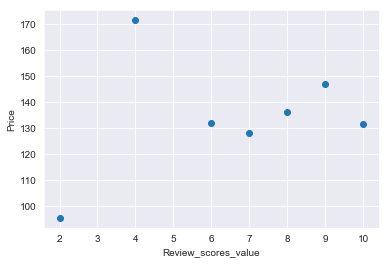

In [217]:
plt.scatter(per_rate.review_scores_value , per_rate.price)
plt.xlabel('Review_scores_value')
plt.ylabel('Price');

In [218]:
df2 = new_df.groupby("date")[["price"]].sum()
df2["mean"]  = new_df.groupby("date")[["price"]].mean()
df2.columns = ["Total", "Average"]
df2.head()

,Total,Average
date,,
2016-01-04,148082.0,121.978583
2016-01-05,155658.0,119.736923
2016-01-06,151487.0,120.037242
2016-01-07,146395.0,119.995902
2016-01-08,156058.0,127.290375


In [219]:
trace = go.Scatter(
    x = df2.index,
    y = df2["Average"]
)

data = [trace2]
layout = go.Layout(
    title = "Price by each time",
    xaxis  = dict(title = "Time"),
    yaxis = dict(title = "Mean ($)")
)
fig = go.Figure(data = data, layout = layout)
offline.iplot(fig)

In [220]:
df3 = new_df.set_index("date")
df3.index = pd.to_datetime(df3.index)
df3 =  df3[["price"]].resample("M").mean()
df3.head()

,price
date,
2016-01-31,120.602429
2016-02-29,123.207713
2016-03-31,128.101769
2016-04-30,134.608485
2016-05-31,140.135880


In [221]:
trace2 = go.Scatter(
    x = df3.index[:-1],
    y = df3.price[:-1]
)
layout2 = go.Layout(
    title = "Average price by month",
    xaxis = dict(title = "time"),
    yaxis = dict(title = "Price")
)
data2 = [trace2]
fig2 = go.Figure(data= data2, layout= layout2)
offline.iplot(fig2)

In [222]:
def interactive_graph(mode):
    df2.index = pd.to_datetime(df2.index)
    decomposition = seasonal_decompose(df2[[mode]])
    trace3_1 = go.Scatter(
        x = decomposition.observed.index, 
        y = decomposition.observed[mode],
        name = "Observed"
    )
    trace3_2 = go.Scatter(
        x = decomposition.trend.index,
        y = decomposition.trend[mode],
        name = "Trend"
    )
    trace3_3 = go.Scatter(
        x = decomposition.seasonal.index,
        y = decomposition.seasonal[mode],
        name = "Seasonal"
    )
    trace3_4 = go.Scatter(
        x = decomposition.resid.index,
        y = decomposition.resid[mode],
        name = "Resid"
    )

    fig = py.tools.make_subplots(rows=4, cols=1, subplot_titles=('Observed', 'Trend',
                                                              'Seasonal', 'Residiual'))
    # append trace into fig
    fig.append_trace(trace3_1, 1, 1)
    fig.append_trace(trace3_2, 2, 1)
    fig.append_trace(trace3_3, 3, 1)
    fig.append_trace(trace3_4, 4, 1)

    fig['layout'].update( title='TimeSeries')
    offline.iplot(fig)

In [223]:
interactive_graph("Average")

In [189]:
interactive_graph("Total")

# Sentimnt analysis

Question 3 - SENTIMENT ANALYSIS OF REVIEWS¶


1. Understand positive and negative sentiments from review comments
2. Map the positive and negative sentiments to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale
3. Explore some of the worst reviews

##### has a polarity of about -0.3, meaning it is slightly negative, and a subjectivity of about 0.6, meaning it is fairly subjective.

In [224]:
import re  
from nltk.stem.porter import PorterStemmer 


In [225]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [226]:
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in new_df1['comments'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [227]:
new_df1['polarity']=polarity
new_df1['subjectivity']=subjectivity

In [228]:
new_df1.head()

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price,longitude,latitude,polarity,subjectivity
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.433333,0.916667
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.301136,0.493182
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.410417,0.610417
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.358333,0.508333
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.493485,0.509091


In [229]:
new_df1[['listing_id','comments','neighbourhood', 'host_listings_count',
          'review_scores_value','price', 'longitude', 'latitude','polarity','subjectivity']][new_df1.polarity<0].head(10)

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price,longitude,latitude,polarity,subjectivity
164,3242605,"Cozy and very private space! Close to beach, s...",Seaview,1.0,10.0,60.000000,-122.371025,47.636289,-0.128241,0.606019
877,1707064,"The space looks just as seen in pictures, arts...",Belltown,1.0,9.0,186.635854,-122.372471,47.632918,-0.125000,1.000000
955,931758,This unit is akin to longterm corporate housin...,Belltown,169.0,9.0,278.673239,-122.372471,47.632918,-0.011029,0.577941
1168,3811955,I stayed here for only 3 nights and I think it...,Stevens,18.0,9.0,30.148148,-122.372471,47.632918,-0.050897,0.552692
1417,208356,Just like the pictures! Nothing to hide.. not...,International District,3.0,9.0,102.722714,-122.368519,47.636605,-0.112500,0.587500
1649,208356,L'esperienza presso il loft di Dirk & Jaq è st...,International District,3.0,9.0,102.722714,-122.375856,47.640161,-0.125000,0.375000
1730,208356,Det gik meget fint med at få adgang til nøgler...,International District,3.0,9.0,102.722714,-122.366889,47.637492,-0.366667,0.333333
2158,284087,This place is extremely close to downtown Seat...,First Hill,2.0,9.0,197.906907,-122.360046,47.637214,-0.035000,0.540278
2478,4279578,Donna was extremely helpful and asked several ...,Green Lake,1.0,10.0,84.355705,-122.367629,47.629507,-0.062500,0.500000
3242,7746170,When I arrived at Brittany's home she didn't b...,Fairmount Park,1.0,9.0,65.000000,-122.366602,47.626200,-0.200000,0.450000


In [230]:
new_df1[['listing_id','comments','neighbourhood', 'host_listings_count',
          'review_scores_value','price', 'longitude', 'latitude','polarity','subjectivity']][new_df1.polarity>0].head(10)

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price,longitude,latitude,polarity,subjectivity
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.433333,0.916667
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.301136,0.493182
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.410417,0.610417
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.358333,0.508333
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.493485,0.509091
5,7202016,"Kelly was great, place was great, just what I ...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.491667,0.639286
6,7202016,Kelly was great! Very nice and the neighborhoo...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.480000,0.616667
7,7202016,hola all bnb erz - Just left Seattle where I h...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.439583,0.645833
8,7202016,Kelly's place is conveniently located on a qui...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.171905,0.596905
9,7202016,"The place was really nice, clean, and the most...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,0.460000,0.806667


In [231]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (15,15))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 35)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

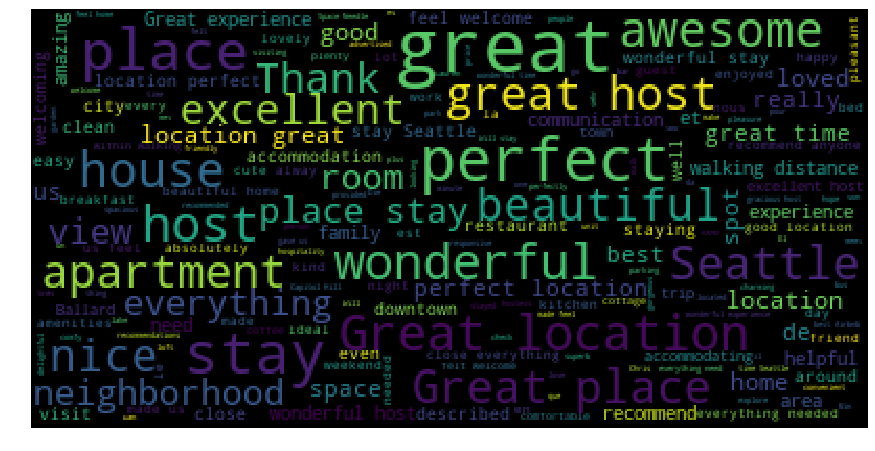

In [232]:
wc(new_df1['comments'][new_df1.polarity>0.8],'black','Common Words' )

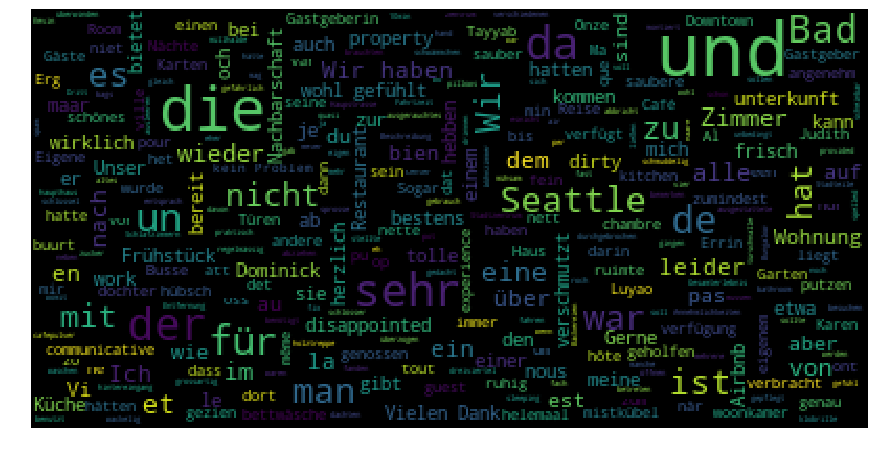

In [233]:
wc(new_df1['comments'][new_df1.polarity<-0.4],'black','Common Words' )

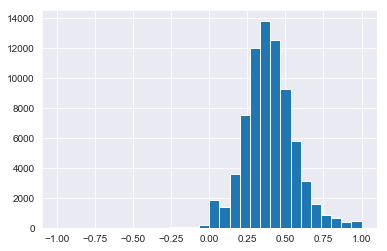

In [234]:
new_df1.polarity.hist(bins=30);

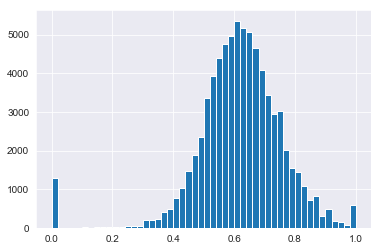

In [235]:
new_df1.subjectivity.hist(bins=50)

In [236]:
new_df1['polarity'][new_df1.polarity==0]= 0
new_df1['polarity'][new_df1.polarity > 0]= 1
new_df1['polarity'][new_df1.polarity < 0]= -1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
# new_df1.polarity.value_counts().plot.bar()
new_df1.polarity.value_counts()

 1.0    73342
 0.0     1366
-1.0      362
Name: polarity, dtype: int64

In [238]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928844 entries, 0 to 1393213
Data columns (total 7 columns):
listing_id    928844 non-null int64
date          928844 non-null datetime64[ns]
available     928844 non-null object
price         928844 non-null float64
month         928844 non-null int64
year          928844 non-null int64
day           928844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 56.7+ MB


In [239]:
new_df1.head()

,listing_id,comments,neighbourhood,host_listings_count,review_scores_value,price,longitude,latitude,polarity,subjectivity
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,1.0,0.916667
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,1.0,0.493182
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,1.0,0.610417
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,1.0,0.508333
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,1.0,10.0,76.145251,-122.371025,47.636289,1.0,0.509091


In [240]:
print('Positive compound scores: ',new_df1['polarity'][new_df1['polarity'] == 1].count())
print('Negative compound scores: ',new_df1['polarity'][new_df1['polarity'] == 0].count())
print('Negative compound scores: ',new_df1['polarity'][new_df1['polarity'] == -1].count())

Positive compound scores:  73342
Negative compound scores:  1366
Negative compound scores:  362


In [241]:
def precentage(part , whole):
    return 100 * float(part)/float(whole)

In [242]:
# we should combined the two dataset ( reviews and listing )
neigh_polarity = new_df1.groupby('listing_id')[['polarity', 'price']].mean()
neigh_polarity.sort_values(by='polarity',ascending=False).head()

,polarity,price
listing_id,,
5031357,1.0,72.872928
6591879,1.0,225.000000
6678058,1.0,134.837079
6676926,1.0,125.979167
6662639,1.0,175.000000


In [248]:
# we should combined the two dataset ( reviews and listing )
neigh_polarity = new_df1.groupby('neighbourhood')[['polarity', 'price']].max()
neigh_polarity.sort_values(by='polarity').head()

,polarity,price
neighbourhood,,
Adams,1.0,536.810345
Portage Bay,1.0,768.658892
Pioneer Square,1.0,392.975207
Pinehurst,1.0,249.295455
Pike-Market,1.0,557.000000
